# **Description**

H&M Group is a family of brands and businesses with 53 online markets and approximately 4,850 stores. Our online store offers shoppers an extensive selection of products to browse through. But with too many choices, customers might not quickly find what interests them or what they are looking for, and ultimately, they might not make a purchase. To enhance the shopping experience, product recommendations are key. More importantly, helping customers make the right choices also has a positive implications for sustainability, as it reduces returns, and thereby minimizes emissions from transportation.

# **Files**
- `articles.csv` - detailed metadata for each article_id available for purchase
- `customers.csv` - metadata for each customer_id in dataset
- `sample_submission.csv` - a sample submission file in the correct format
- `transactions_train.csv` - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.

# **Code**

## **Import required libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## **Loading the Data**

In [3]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

In [4]:
# Take a look at the data
print("Articles data:")
display(articles.head())
print("---------------------------------------------------------------------------------------------------")
print("Customers data:")
display(customers.head())
print("---------------------------------------------------------------------------------------------------")
print("Transactions data:")
display(transactions.head())

Articles data:


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


---------------------------------------------------------------------------------------------------
Customers data:


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


---------------------------------------------------------------------------------------------------
Transactions data:


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [5]:
# Gain some initial insights from the data
total_unque_article = len(pd.unique(articles['article_id']))
total_unique_customers = len(pd.unique(customers['customer_id']))
total_unique_customers_transactions = len(pd.unique(transactions['customer_id']))


percent_customers_buy = total_unique_customers_transactions/total_unique_customers
percent_customers_not_buy = 1 - percent_customers_buy

print(f"Total No of Articles: {total_unque_article}")
print(f"Total No of Customers: {total_unique_customers}")
print(f"Number of Customers who made at least 1 transaction: {total_unique_customers_transactions}")
print(f"% of Customers who made at least 1 transaction: {percent_customers_buy*100:.2f}%")
print(f"Number of Customers who did not make any transaction: {total_unique_customers - total_unique_customers_transactions}")
print(f"% of Customers who did not make any transaction: {percent_customers_not_buy*100:.2f}%")

Total No of Articles: 105542
Total No of Customers: 1371980
Number of Customers who made at least 1 transaction: 1362281
% of Customers who made at least 1 transaction: 99.29%
Number of Customers who did not make any transaction: 9699
% of Customers who did not make any transaction: 0.71%


There are 3 main tables:

- **articles** - contains informations about each article (like product code, name, product group code, name ...)
- **customers** - contains informations about each customer (fidelity card membership, age, postal code)
- **transactions** (train)
Transactions have `customer_id` and `article_id`, which are foreign keys for the customer and articles tables. Beside this, transaction also contains `sales_channel_id`.

In [6]:
# Get the shape of all three dataframes
shape = pd.DataFrame({'Total Rows' : [articles.shape[0], customers.shape[0], transactions.shape[0]],
                      'Total Columns' : [articles.shape[1], customers.shape[1], transactions.shape[1]]},
                      index = ['articles', 'customers', 'transactions'])

# Print the shape of all three dataframes
shape

,Total Rows,Total Columns
articles,105542,25
customers,1371980,7
transactions,31788324,5


In [7]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum() / data.shape[0] * 100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [8]:
def unique_data(data):
    total = data.count().sort_values(ascending = False)
    unique = data.nunique().sort_values(ascending = False)
    return pd.concat([total, unique], axis = 1, keys = ['Total', 'Unique'])


## **EDA Data**

### **Articles**

In [9]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [10]:
print(missing_data(articles))

                              Total   Percent
detail_desc                     416  0.394156
perceived_colour_master_name      0  0.000000
garment_group_name                0  0.000000
garment_group_no                  0  0.000000
section_name                      0  0.000000
section_no                        0  0.000000
index_group_name                  0  0.000000
index_group_no                    0  0.000000
index_name                        0  0.000000
index_code                        0  0.000000
department_name                   0  0.000000
department_no                     0  0.000000
article_id                        0  0.000000
product_code                      0  0.000000
perceived_colour_value_name       0  0.000000
perceived_colour_value_id         0  0.000000
colour_group_name                 0  0.000000
colour_group_code                 0  0.000000
graphical_appearance_name         0  0.000000
graphical_appearance_no           0  0.000000
product_group_name                

In [11]:
print(unique_data(articles))

                               Total  Unique
article_id                    105542  105542
perceived_colour_master_name  105542      20
garment_group_name            105542      21
garment_group_no              105542      21
section_name                  105542      56
section_no                    105542      57
index_group_name              105542       5
index_group_no                105542       5
index_name                    105542      10
index_code                    105542      10
department_name               105542     250
department_no                 105542     299
perceived_colour_master_id    105542      20
product_code                  105542   47224
perceived_colour_value_name   105542       8
perceived_colour_value_id     105542       8
colour_group_name             105542      50
colour_group_code             105542      50
graphical_appearance_name     105542      30
graphical_appearance_no       105542      30
product_group_name            105542      19
product_ty

In [12]:
articles.groupby(['index_group_name','index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

Index

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/2908497422.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_index_name, y = 'index_name', x = 'count', palette = 'Oranges_r')


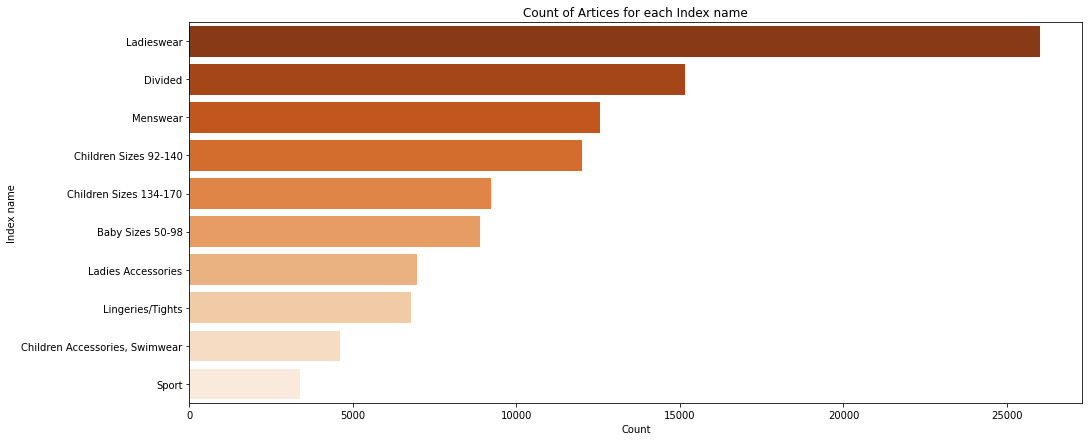

In [13]:
count_df_index_name = articles['index_name'].value_counts().reset_index()
count_df_index_name.columns = ['index_name', 'count']

count_df_index_name = count_df_index_name.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 7))

sns.barplot(data = count_df_index_name, y = 'index_name', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Index name')
plt.title('Count of Artices for each Index name')
plt.show()

Garment

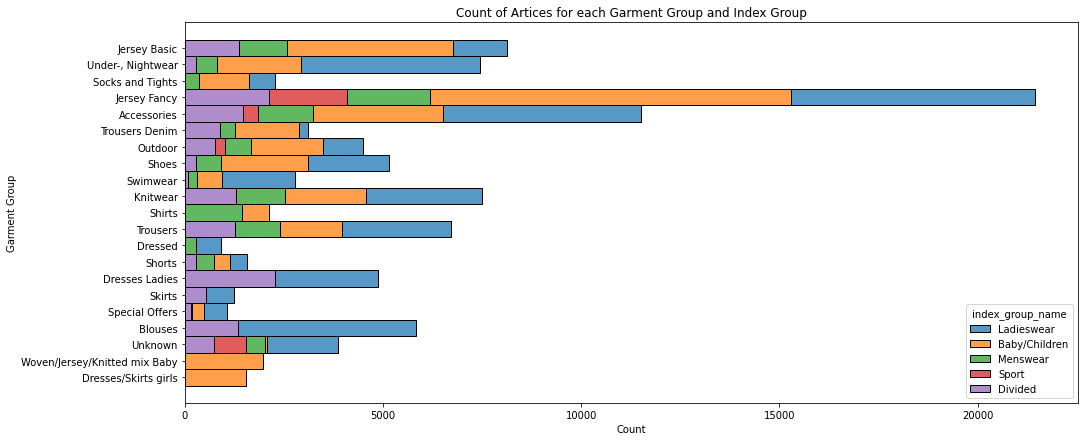

In [14]:
plt.figure(figsize = (16, 7))

sns.histplot(data = articles, y = 'garment_group_name', hue = 'index_group_name', multiple = 'stack')
plt.xlabel('Count')
plt.ylabel('Garment Group')
plt.title('Count of Artices for each Garment Group and Index Group')
plt.show()

**Ladieswear** accounts for a significant portion of articles across multiple indexes, especially in the most popular ones. The second group is **Divided** - teenagers.\
**Sportswear**, on the other hand, has a more balanced but smaller representation.\
**Jersey fancy** is the most frequent garment, especially for women and children.

Product Group and Product Type

In [15]:
# Look at product_group_name
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/2203786008.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_product_group_name, y = 'product_group_name', x = 'count', palette = 'Oranges_r')


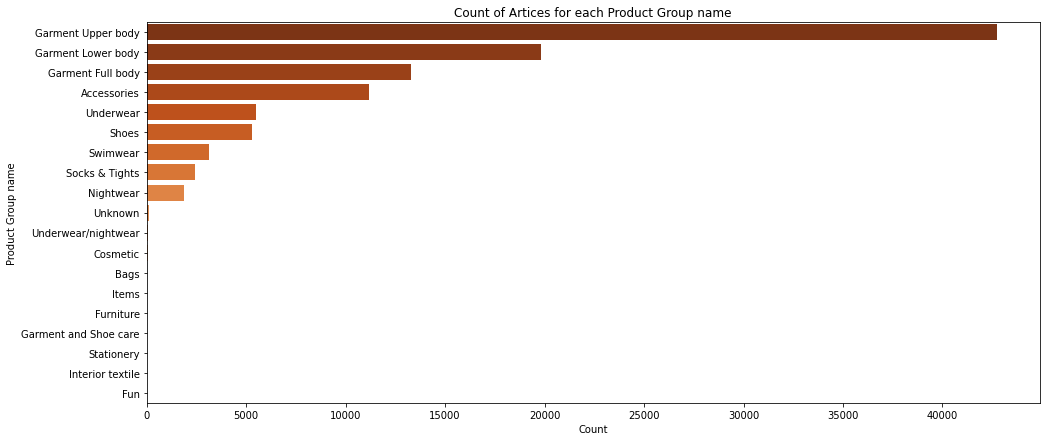

In [16]:
count_df_product_group_name = articles['product_group_name'].value_counts().reset_index()
count_df_product_group_name.columns = ['product_group_name', 'count']

count_df_product_group_name = count_df_product_group_name.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 7))

sns.barplot(data = count_df_product_group_name, y = 'product_group_name', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Product Group name')
plt.title('Count of Artices for each Product Group name')
plt.show()

We can see clearly that most of articles lays in only few groups. Let's see more

In [17]:
df_prod_group = articles['product_group_name'].value_counts()
df_prod_group = df_prod_group.div(df_prod_group.sum()).mul(100)
pareto = df_prod_group.cumsum().rename('cumulative_sum')
pareto

product_group_name
Garment Upper body        40.496674
Garment Lower body        59.268348
Garment Full body         71.862387
Accessories               82.434481
Underwear                 87.636202
Shoes                     92.641792
Swimwear                  95.604593
Socks & Tights            97.918364
Nightwear                 99.717648
Unknown                   99.832294
Underwear/nightwear       99.883459
Cosmetic                  99.929886
Bags                      99.953573
Items                     99.969680
Furniture                 99.981998
Garment and Shoe care     99.990525
Stationery                99.995263
Interior textile          99.998105
Fun                      100.000000
Name: cumulative_sum, dtype: float64

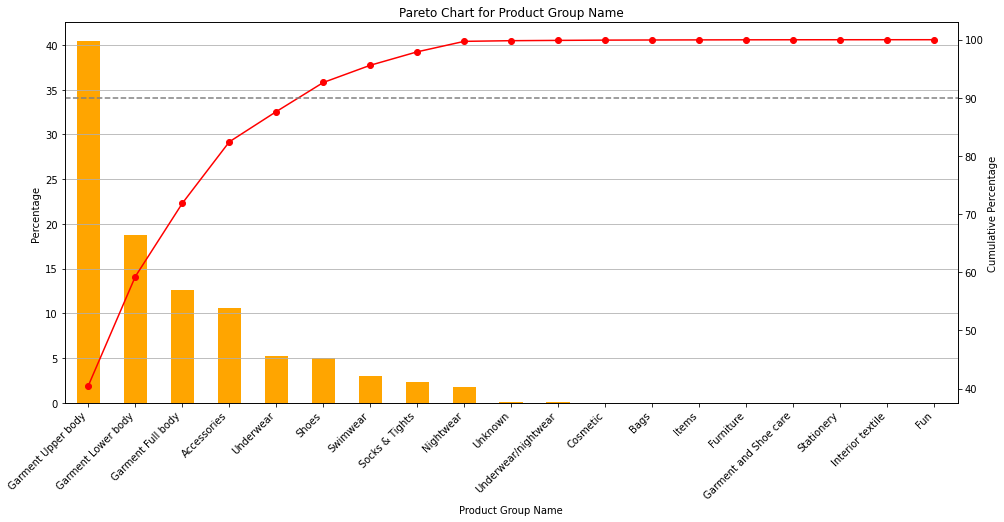

In [18]:
# Combine the percentages and cumulative percentages into a DataFrame
df_pareto = pd.DataFrame({'percentage': df_prod_group, 'cumulative_sum': pareto})

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 7))

# Bar chart for percentage
df_pareto['percentage'].plot(kind='bar', color='orange', ax=ax1)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Product Group Name')
ax1.tick_params(axis='x', rotation=90)

# Rotate x-axis labels 45 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Line chart for cumulative percentage
ax2 = ax1.twinx()
df_pareto['cumulative_sum'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Cumulative Percentage')

# Highlight the Pareto principle (80% threshold)
ax2.axhline(90, color='gray', linestyle='--')
plt.title('Pareto Chart for Product Group Name')
ax1.grid(True, axis='y')

# Show plot
plt.show()

In [19]:
for group in articles['product_group_name'].unique():
    print("Number of subcategories in '{}' is {}".format(group, len(articles.groupby(['product_group_name', 'product_type_name']).size()[group])))

Number of subcategories in 'Garment Upper body' is 15
Number of subcategories in 'Underwear' is 11
Number of subcategories in 'Socks & Tights' is 3
Number of subcategories in 'Garment Lower body' is 5
Number of subcategories in 'Accessories' is 38
Number of subcategories in 'Items' is 5
Number of subcategories in 'Nightwear' is 4
Number of subcategories in 'Unknown' is 1
Number of subcategories in 'Underwear/nightwear' is 2
Number of subcategories in 'Shoes' is 16
Number of subcategories in 'Swimwear' is 6
Number of subcategories in 'Garment Full body' is 6
Number of subcategories in 'Cosmetic' is 2
Number of subcategories in 'Interior textile' is 3
Number of subcategories in 'Bags' is 6
Number of subcategories in 'Furniture' is 1
Number of subcategories in 'Garment and Shoe care' is 6
Number of subcategories in 'Fun' is 1
Number of subcategories in 'Stationery' is 1


Color

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/2753159158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_color_group_name, y = 'colour_group_name', x = 'count', palette = 'Oranges_r')


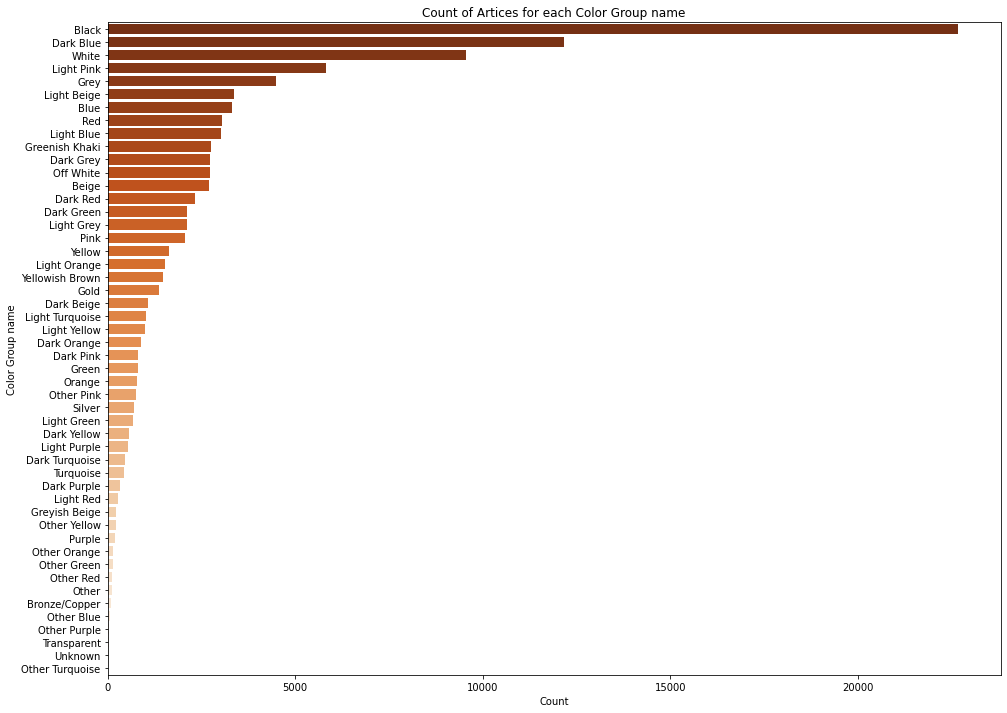

In [20]:
count_df_color_group_name = articles['colour_group_name'].value_counts().reset_index()
count_df_color_group_name.columns = ['colour_group_name', 'count']

count_df_color_group_name = count_df_color_group_name.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 12))

sns.barplot(data = count_df_color_group_name, y = 'colour_group_name', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Color Group name')
plt.title('Count of Artices for each Color Group name')
plt.show()

Perceived colour

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/2920930983.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_perceived_color_name, y = 'perceived_colour_value_name', x = 'count', palette = 'Oranges_r')


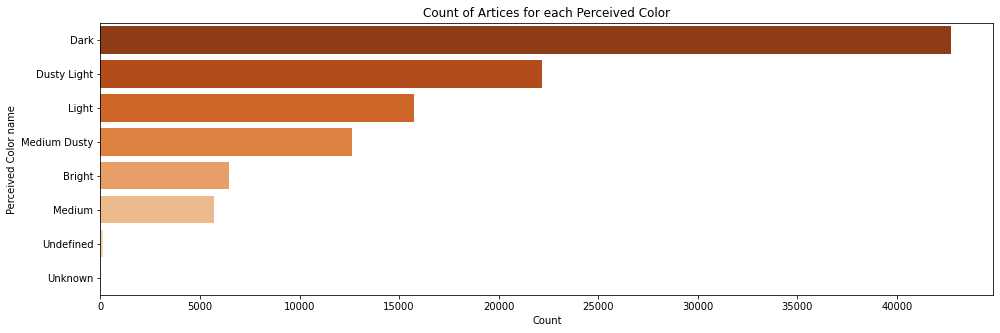

In [21]:
count_df_perceived_color_name = articles['perceived_colour_value_name'].value_counts().reset_index()
count_df_perceived_color_name.columns = ['perceived_colour_value_name', 'count']

count_df_perceived_color_name = count_df_perceived_color_name.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 5))

sns.barplot(data = count_df_perceived_color_name, y = 'perceived_colour_value_name', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Perceived Color name')
plt.title('Count of Artices for each Perceived Color')
plt.show()

Patterns

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/3614940138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_pattern, y = 'graphical_appearance_name', x = 'count', palette = 'Oranges_r')


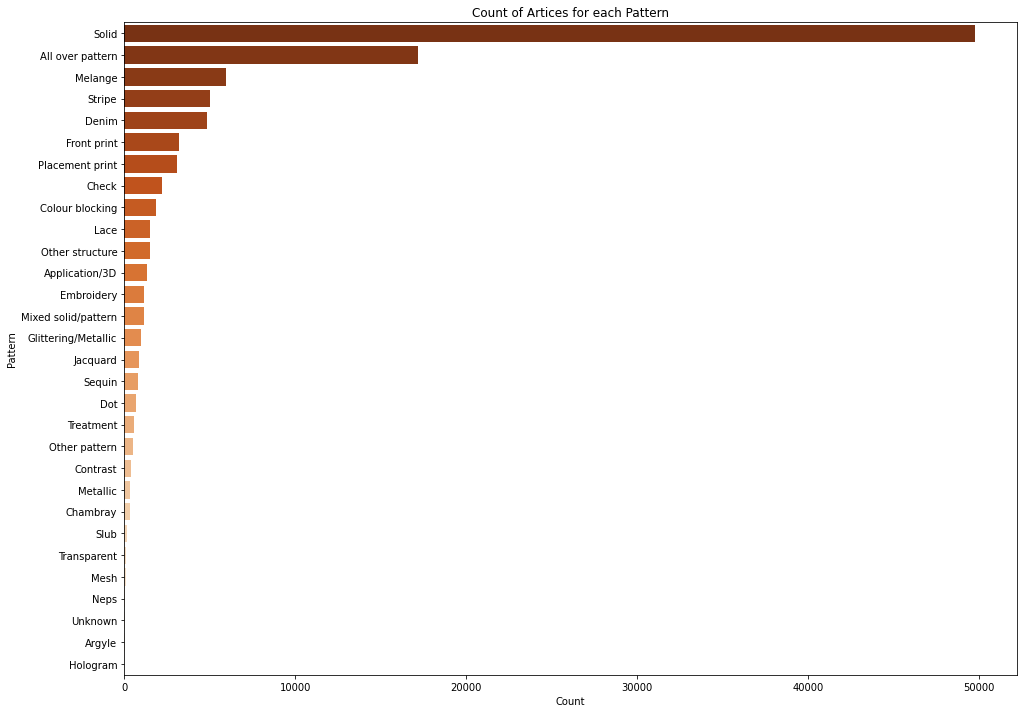

In [22]:
count_df_pattern = articles['graphical_appearance_name'].value_counts().reset_index()
count_df_pattern.columns = ['graphical_appearance_name', 'count']

count_df_pattern = count_df_pattern.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 12))

sns.barplot(data = count_df_pattern, y = 'graphical_appearance_name', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Pattern')
plt.title('Count of Artices for each Pattern')
plt.show()

### **Customers**

In [23]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [24]:
print(missing_data(customers))

                         Total    Percent
Active                  907576  66.150819
FN                      895050  65.237831
fashion_news_frequency   16011   1.167000
age                      15861   1.156066
club_member_status        6062   0.441843
customer_id                  0   0.000000
postal_code                  0   0.000000


In [25]:
print(unique_data(customers))

                          Total   Unique
customer_id             1371980  1371980
postal_code             1371980   352899
club_member_status      1365918        3
age                     1356119       84
fashion_news_frequency  1355969        3
FN                       476930        1
Active                   464404        1


Club member status

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/1843264304.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_club_member, y = 'club_member_status', x = 'count', palette = 'Oranges_r')


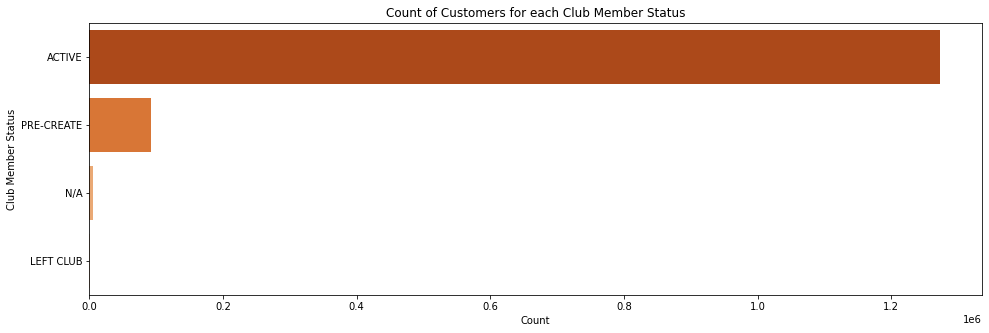

In [26]:
customers['club_member_status'] = customers['club_member_status'].fillna('N/A')

count_df_club_member = customers['club_member_status'].value_counts().reset_index()
count_df_club_member.columns = ['club_member_status', 'count']

count_df_club_member = count_df_club_member.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 5))

sns.barplot(data = count_df_club_member, y = 'club_member_status', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Club Member Status')
plt.title('Count of Customers for each Club Member Status')
plt.show()

Fashion News Frequency

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/2291249629.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_fashion_news, y = 'fashion_news_frequency', x = 'count', palette = 'Oranges_r')


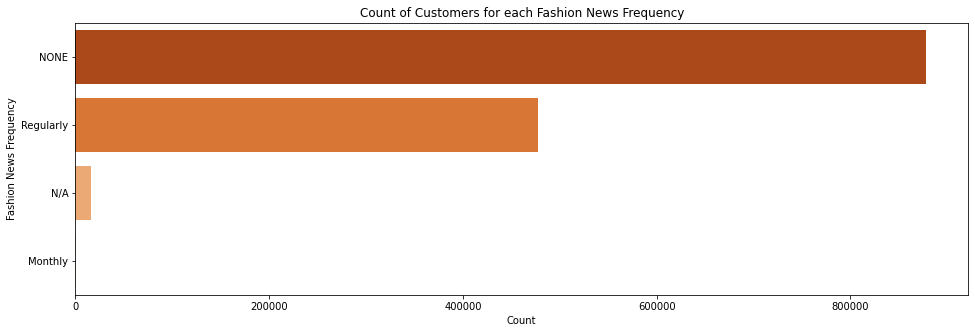

In [27]:
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('N/A')

count_df_fashion_news = customers['fashion_news_frequency'].value_counts().reset_index()
count_df_fashion_news.columns = ['fashion_news_frequency', 'count']

count_df_fashion_news = count_df_fashion_news.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 5))

sns.barplot(data = count_df_fashion_news, y = 'fashion_news_frequency', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Fashion News Frequency')
plt.title('Count of Customers for each Fashion News Frequency')
plt.show()

In [28]:
count_custs = customers.groupby(['club_member_status', 'fashion_news_frequency']).size().reset_index(name='count')

# Calculate the percentage
count_custs['percentage'] = count_custs['count'] / count_custs['count'].sum() * 100

# Display the result
count_custs

,club_member_status,fashion_news_frequency,count,percentage
0,ACTIVE,Monthly,778,0.056706
1,ACTIVE,N/A,11927,0.869328
2,ACTIVE,NONE,788482,57.470371
3,ACTIVE,Regularly,471304,34.352104
4,LEFT CLUB,NONE,459,0.033455
5,LEFT CLUB,Regularly,8,0.000583
6,N/A,Monthly,5,0.000364
7,N/A,N/A,2035,0.148326
8,N/A,NONE,3705,0.270048
9,N/A,Regularly,317,0.023105


Age

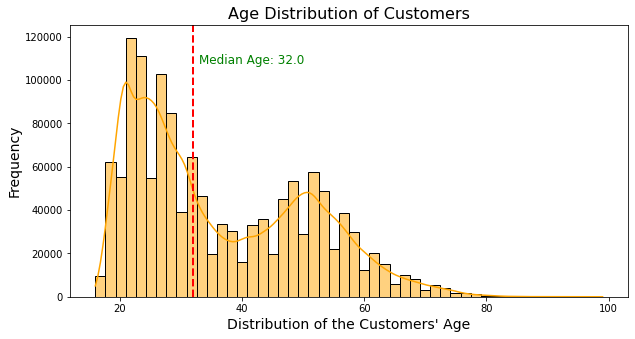

In [29]:
median_age = customers['age'].median()

# Create the plot
f, ax = plt.subplots(figsize=(10, 5))

# Plot the histogram
ax = sns.histplot(data=customers, x='age', bins=50, color='orange', kde=True)
ax.set_xlabel('Distribution of the Customers\' Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Age Distribution of Customers', fontsize=16)

# Add the median age line
plt.axvline(median_age, color='red', linestyle='--', linewidth=2)
plt.text(median_age + 1, max(ax.patches, key=lambda p: p.get_height()).get_height() * 0.9,
         f'Median Age: {median_age}', color='green', fontsize=12)

# Show the plot
plt.show()

In [30]:
customers['Active'] = customers['Active'].fillna(0)

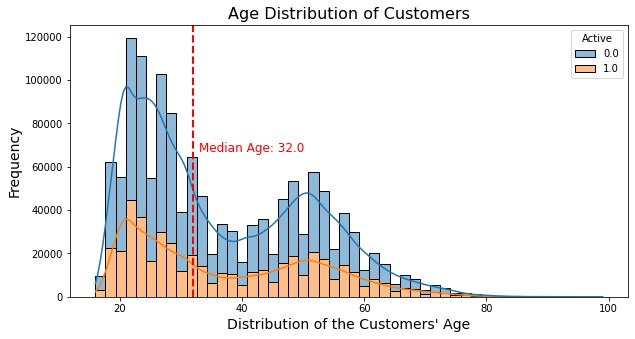

In [31]:
# Create the plot
f, ax = plt.subplots(figsize=(10, 5))

# Plot the histogram with hue for Active status
ax = sns.histplot(data=customers, x='age', bins=50, hue='Active', kde=True, multiple='stack')

# Customize labels and title
ax.set_xlabel('Distribution of the Customers\' Age', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Age Distribution of Customers', fontsize=16)

# Add the median age line
plt.axvline(median_age, color='red', linestyle='--', linewidth=2)
plt.text(median_age + 1, max([patch.get_height() for patch in ax.patches]) * 0.9,
         f'Median Age: {median_age}', color='red', fontsize=12)

# Show the plot
plt.show()

The distribution shows that there are two main age-groups of customers: around **20-30 years old** and **45-55 years old**

In [32]:
labels = ["10","20","30","40","50","60","70","80","90","100"]
labels_number = [int(label) for label in labels]
labels = [f"{label}'s" for label in labels]
d = pd.cut(customers["age"], labels_number, include_lowest=True, right=False, labels=labels[:-1])
customers["age_binned"] = pd.Categorical(d, categories=labels[:-1], ordered=True)

In [33]:
customers["age_binned"].value_counts()

age_binned
20's    528358
30's    234068
50's    226242
40's    204118
60's     72623
10's     71583
70's     17611
80's      1415
90's       101
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/1521341196.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = count_df_age_group, y = 'age_binned', x = 'count', palette = 'Oranges_r')


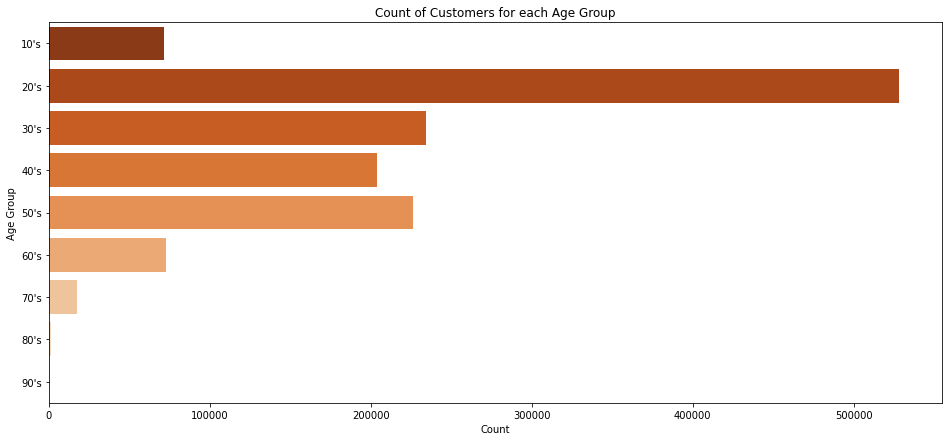

In [34]:
count_df_age_group = customers['age_binned'].value_counts().reset_index()
count_df_age_group.columns = ['age_binned', 'count']

count_df_age_group = count_df_age_group.sort_values(by = 'count', ascending = False)

plt.figure(figsize = (16, 7))

sns.barplot(data = count_df_age_group, y = 'age_binned', x = 'count', palette = 'Oranges_r')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Count of Customers for each Age Group')
plt.show()

### **Transactions**

In [35]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [36]:
print(missing_data(transactions))

                  Total  Percent
t_dat                 0      0.0
customer_id           0      0.0
article_id            0      0.0
price                 0      0.0
sales_channel_id      0      0.0


In [37]:
print(unique_data(transactions))

                     Total   Unique
t_dat             31788324      734
customer_id       31788324  1362281
article_id        31788324   104547
price             31788324     9857
sales_channel_id  31788324        2


In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

# Extract the year from 't_dat'
transactions['year'] = pd.to_datetime(transactions['t_dat']).dt.year

# Create a column combining 'sales_channel_id' and 'year' for stratification
transactions['stratify_col'] = transactions['sales_channel_id'].astype(str) + '-' + transactions['year'].astype(str)

# Define the stratified shuffle split
split = StratifiedShuffleSplit(n_splits = 1, test_size = 100000, random_state = 42)

# Perform the split
for _, sample_index in split.split(transactions, transactions['stratify_col']):
    stratified_sample = transactions.iloc[sample_index]

# Drop the helper columns if not needed anymore
stratified_sample = stratified_sample.drop(columns=['year', 'stratify_col'])

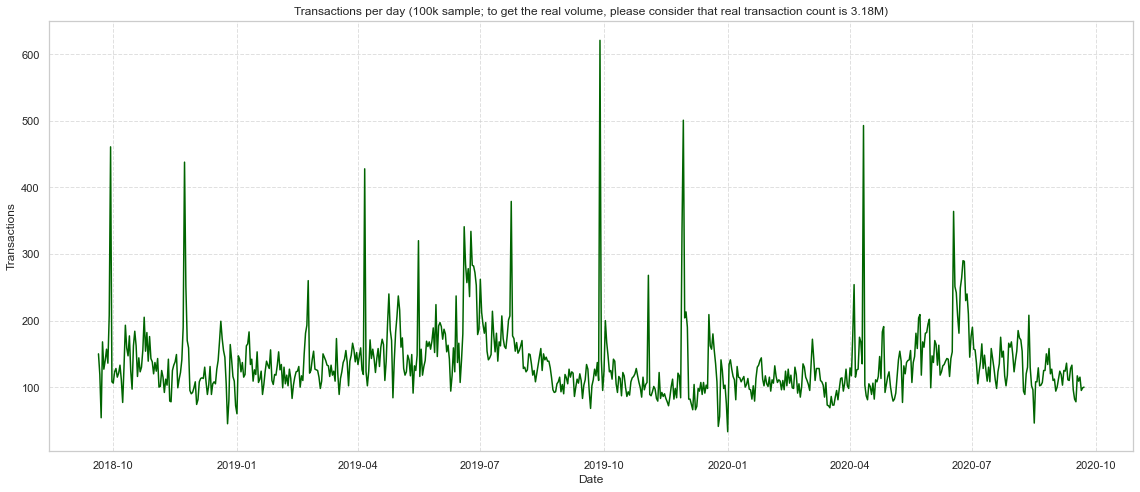

In [65]:
transactions_sample_count = stratified_sample.groupby('t_dat')['article_id'].count().reset_index()

transactions_sample_count['t_dat'] = pd.to_datetime(transactions_sample_count['t_dat'], format='%Y-%m-%d')

transactions_sample_count.columns = ["Date", "Transactions"]

plt.figure(figsize = (16, 7))

plt.plot(transactions_sample_count["Date"], transactions_sample_count["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")

# Adding grid
plt.grid(True, linestyle='--', alpha=0.6)

# Improving the layout
plt.tight_layout()

plt.show()

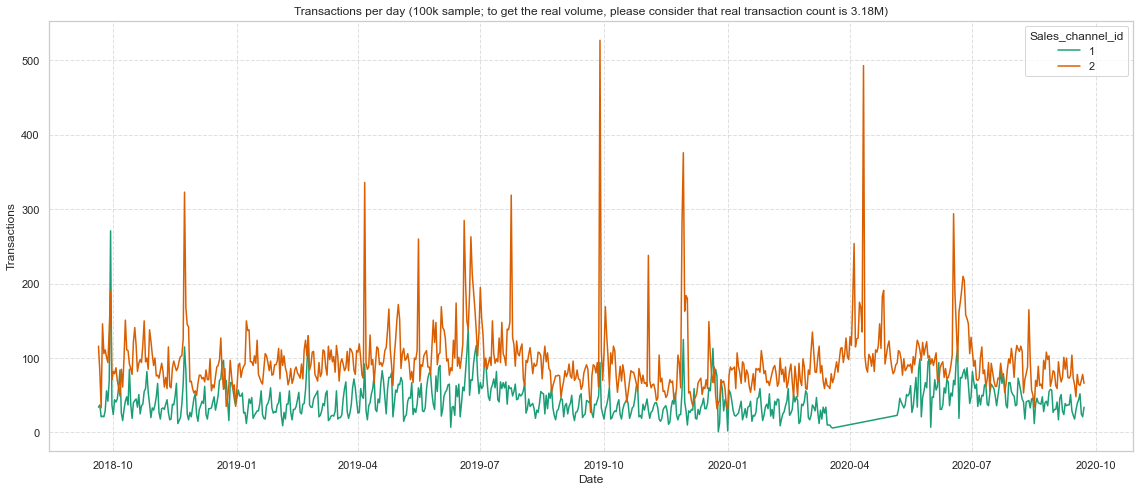

In [64]:
transactions_sample_count = stratified_sample.groupby(['t_dat', 'sales_channel_id'])['article_id'].count().reset_index()

transactions_sample_count['t_dat'] = pd.to_datetime(transactions_sample_count['t_dat'], format='%Y-%m-%d')

transactions_sample_count.columns = ["Date", "Sales_channel_id", "Transactions"]

plt.figure(figsize = (16, 7))

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the data
sns.lineplot(x="Date", y="Transactions", hue="Sales_channel_id", data=transactions_sample_count, palette="Dark2")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")

# Adding grid
plt.grid(True, linestyle='--', alpha=0.6)

# Improving the layout
plt.tight_layout()

plt.show()

Merge transactions to articles 

In [66]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [67]:
articles_for_merge = stratified_sample[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

articles_for_merge.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,98322b5abb3651661775e2bac02e59d32b1fae28cf978d...,759871002,0.005068,2019-07-01,Tilda tank,Vest top,Garment Upper body,Divided
1,3a5e0b4025bc12a5a7c89e5d3dc0879f2628194c13ad7a...,881361001,0.061000,2020-08-30,Eva trousers,Trousers,Garment Lower body,Ladieswear
2,518eaa67834bbfe7bcfe9fa4d9fa4a4a494828e6bc9900...,569940001,0.006763,2019-02-03,Doris ballerina,Ballerinas,Shoes,Baby Sizes 50-98
3,9db5c341b830d25209722b70e22fda513114ba7cb2a7cd...,842112005,0.030492,2020-06-24,Rio romantic tunic,Dress,Garment Full body,Ladieswear
4,86a0c8600135be936059ce178eb9b38ddfb8f393938a88...,507909027,0.025407,2019-01-07,Rebecca,Shirt,Garment Upper body,Ladieswear


Average Price each Product Group

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/1170933303.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=articles_for_merge, x='price', y='product_group_name', palette = "Set2")


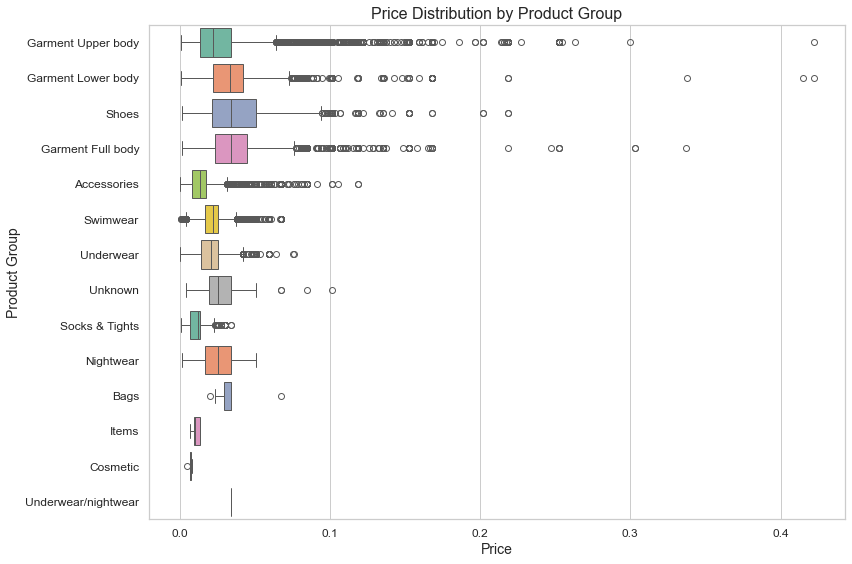

In [75]:
# Set the Seaborn style
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=articles_for_merge, x='price', y='product_group_name', palette = "Set2")

# Customize the plot
plt.xlabel('Price', fontsize=14)
plt.ylabel('Product Group', fontsize=14)
plt.title('Price Distribution by Product Group', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

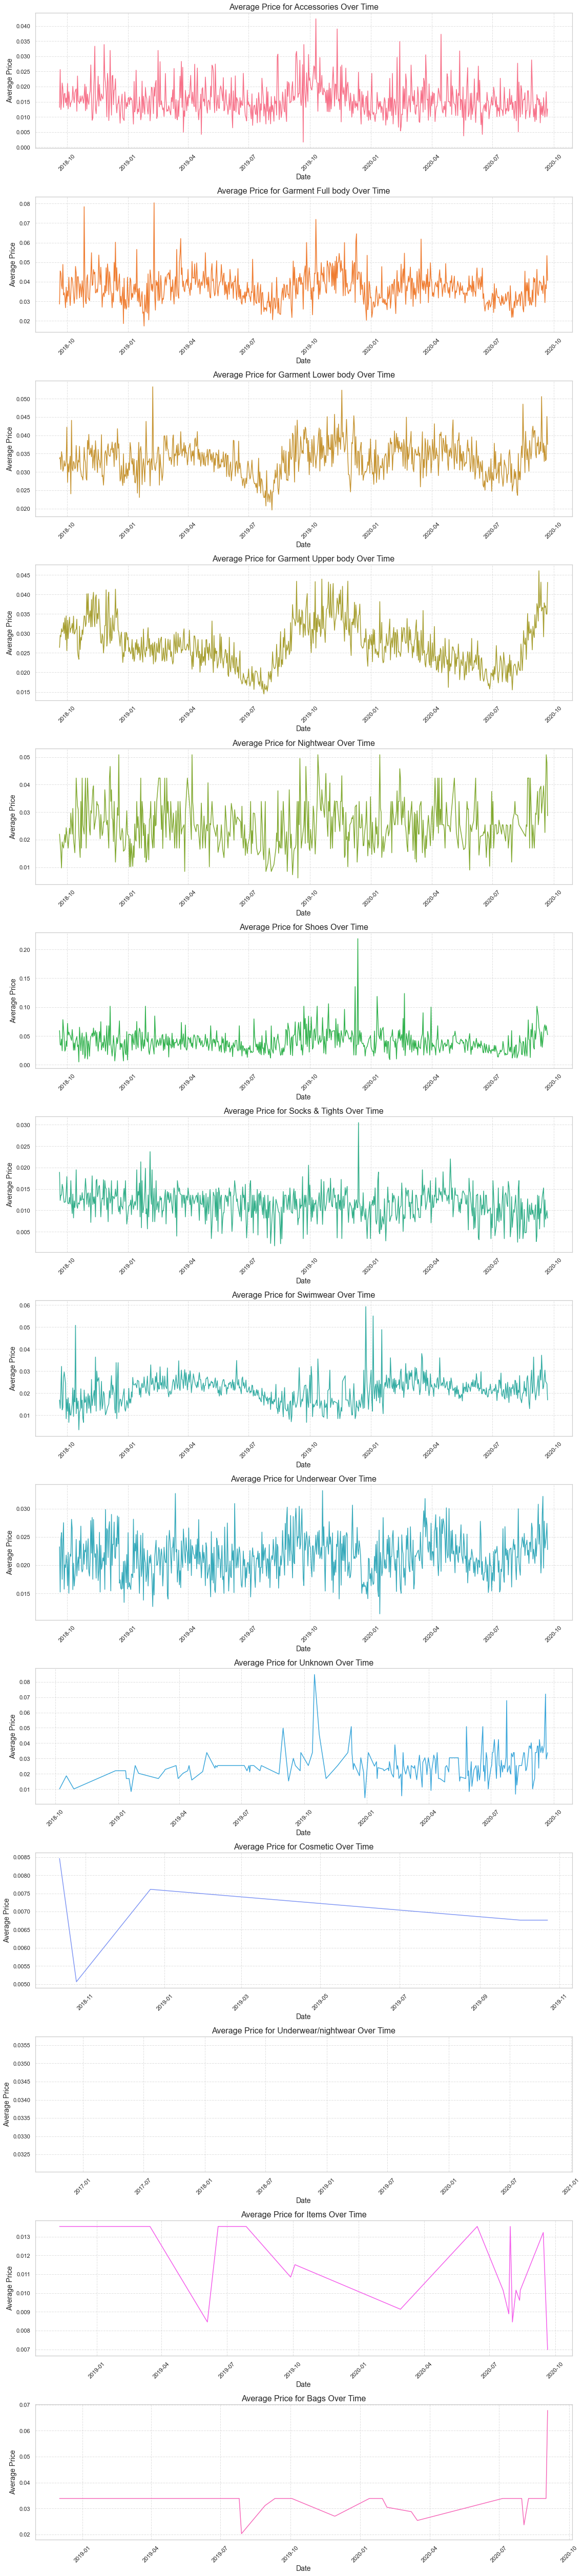

In [84]:
# Group data by 't_dat' and 'product_group_name' and calculate the average price
df_avg_price = articles_for_merge.groupby(['t_dat', 'product_group_name'])['price'].mean().reset_index()

df_avg_price['t_dat'] = pd.to_datetime(df_avg_price['t_dat'], format='%Y-%m-%d')
# Set Seaborn style
sns.set(style="whitegrid")

# Get a list of unique product_group_names
product_groups = df_avg_price['product_group_name'].unique()

# List of colors
colors = sns.color_palette('husl', len(product_groups))

# Create subplots
fig, axs = plt.subplots(len(product_groups), 1, figsize=(16, len(product_groups) * 5))

# Plot each product_group_name in each subplot
for i, (product_group, color) in enumerate(zip(product_groups, colors)):
    ax = axs[i] if len(product_groups) > 1 else axs
    sns.lineplot(data=df_avg_price[df_avg_price['product_group_name'] == product_group],
                 x='t_dat', y='price', ax=ax, color=color)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Average Price", fontsize=14)
    ax.set_title(f"Average Price for {product_group} Over Time", fontsize=16)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

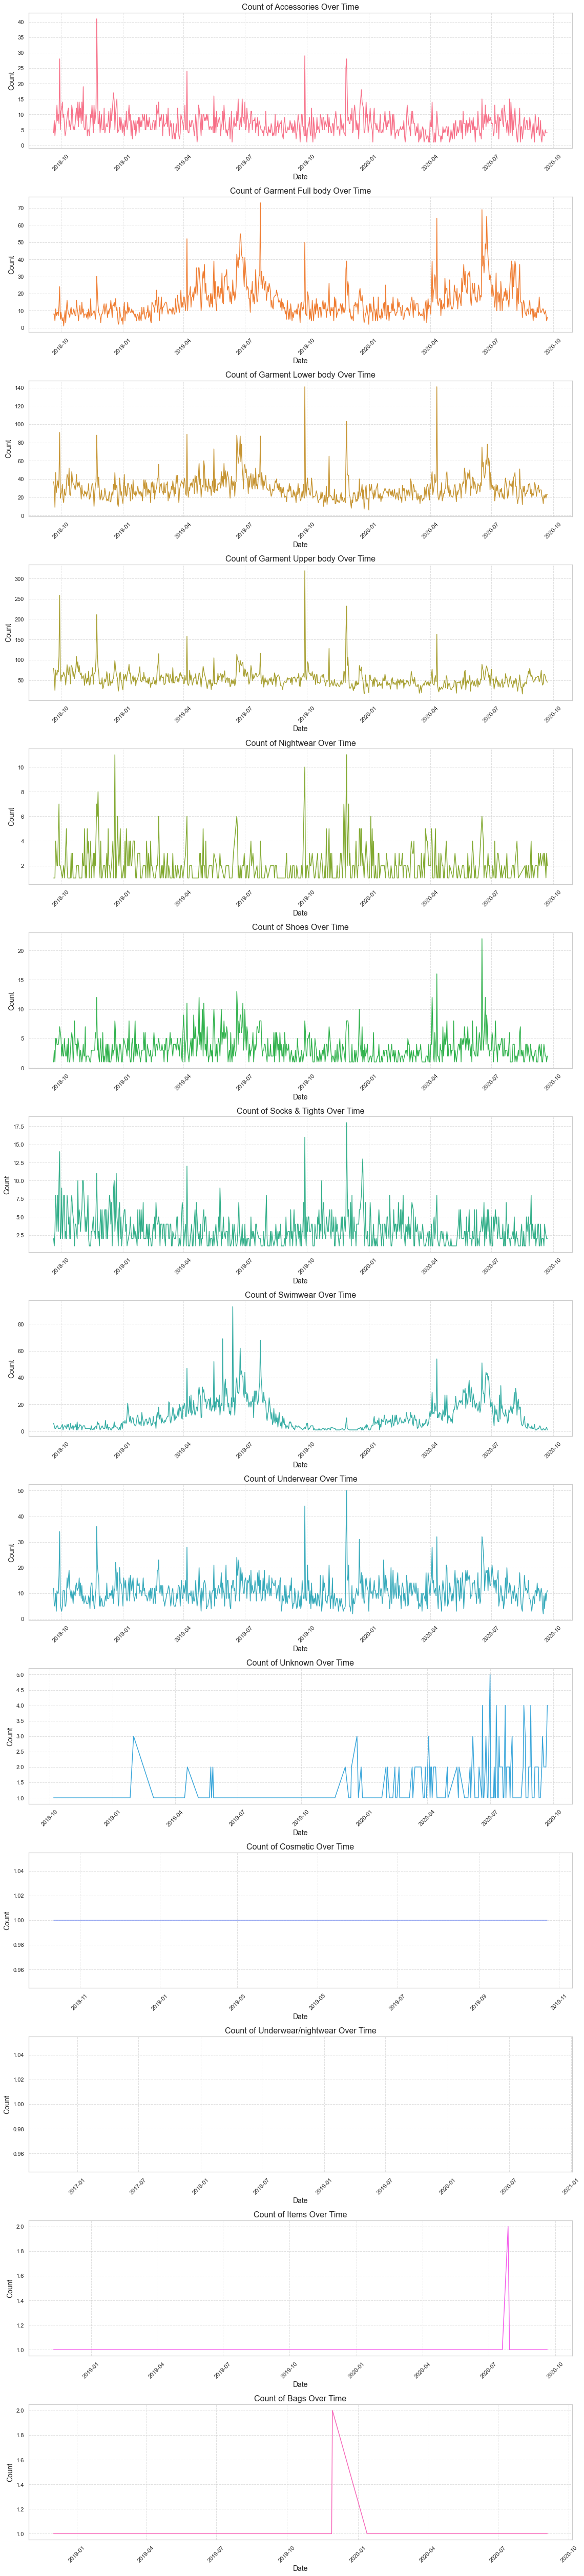

In [86]:
# Group data by 't_dat' and 'product_group_name' and calculate the average price
df_count_price = articles_for_merge.groupby(['t_dat', 'product_group_name']).size().reset_index(name='count')

df_count_price['t_dat'] = pd.to_datetime(df_count_price['t_dat'], format='%Y-%m-%d')
# Set Seaborn style
sns.set(style="whitegrid")

# Get a list of unique product_group_names
product_groups = df_count_price['product_group_name'].unique()

# List of colors
colors = sns.color_palette('husl', len(product_groups))

# Create subplots
fig, axs = plt.subplots(len(product_groups), 1, figsize=(16, len(product_groups) * 5))

# Plot each product_group_name in each subplot
for i, (product_group, color) in enumerate(zip(product_groups, colors)):
    ax = axs[i] if len(product_groups) > 1 else axs
    sns.lineplot(data=df_count_price[df_count_price['product_group_name'] == product_group],
                 x='t_dat', y='count', ax=ax, color=color)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.set_title(f"Count of {product_group} Over Time", fontsize=16)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

Merge transactions to customers

In [90]:
customers_for_merge = stratified_sample[['customer_id', 'article_id', 'price', 't_dat']].merge(customers, on='customer_id', how='left')

customers_for_merge.head()

,customer_id,article_id,price,t_dat,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_binned
0,98322b5abb3651661775e2bac02e59d32b1fae28cf978d...,759871002,0.005068,2019-07-01,1.0,1.0,ACTIVE,Regularly,20.0,5731d89e47b94dcdc9d151da87f05456650027aef49313...,20's
1,3a5e0b4025bc12a5a7c89e5d3dc0879f2628194c13ad7a...,881361001,0.061000,2020-08-30,1.0,1.0,ACTIVE,Regularly,62.0,9b44d40f4137f9139f6a6ea70182f9bbb271bfa19edaf6...,60's
2,518eaa67834bbfe7bcfe9fa4d9fa4a4a494828e6bc9900...,569940001,0.006763,2019-02-03,1.0,1.0,ACTIVE,Regularly,43.0,ff599061d59d9ebfe7a2e127841b2f7884e057e41ac036...,40's
3,9db5c341b830d25209722b70e22fda513114ba7cb2a7cd...,842112005,0.030492,2020-06-24,NaN,0.0,ACTIVE,NONE,34.0,6606c62b6cbb349cecb3fb2da16b3e496bc898d8c7001b...,30's
4,86a0c8600135be936059ce178eb9b38ddfb8f393938a88...,507909027,0.025407,2019-01-07,1.0,1.0,ACTIVE,Regularly,22.0,4a9077fe8bfcbd358e0825dce55a246657ed0af84143fc...,20's


In [91]:
customers_for_merge.head()

,customer_id,article_id,price,t_dat,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_binned
0,98322b5abb3651661775e2bac02e59d32b1fae28cf978d...,759871002,0.005068,2019-07-01,1.0,1.0,ACTIVE,Regularly,20.0,5731d89e47b94dcdc9d151da87f05456650027aef49313...,20's
1,3a5e0b4025bc12a5a7c89e5d3dc0879f2628194c13ad7a...,881361001,0.061000,2020-08-30,1.0,1.0,ACTIVE,Regularly,62.0,9b44d40f4137f9139f6a6ea70182f9bbb271bfa19edaf6...,60's
2,518eaa67834bbfe7bcfe9fa4d9fa4a4a494828e6bc9900...,569940001,0.006763,2019-02-03,1.0,1.0,ACTIVE,Regularly,43.0,ff599061d59d9ebfe7a2e127841b2f7884e057e41ac036...,40's
3,9db5c341b830d25209722b70e22fda513114ba7cb2a7cd...,842112005,0.030492,2020-06-24,NaN,0.0,ACTIVE,NONE,34.0,6606c62b6cbb349cecb3fb2da16b3e496bc898d8c7001b...,30's
4,86a0c8600135be936059ce178eb9b38ddfb8f393938a88...,507909027,0.025407,2019-01-07,1.0,1.0,ACTIVE,Regularly,22.0,4a9077fe8bfcbd358e0825dce55a246657ed0af84143fc...,20's


C:\Users\LENOVO\AppData\Local\Temp/ipykernel_11192/194175338.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_group = customers_for_merge.groupby(['year_month', 'age_binned']).size().reset_index(name='count')


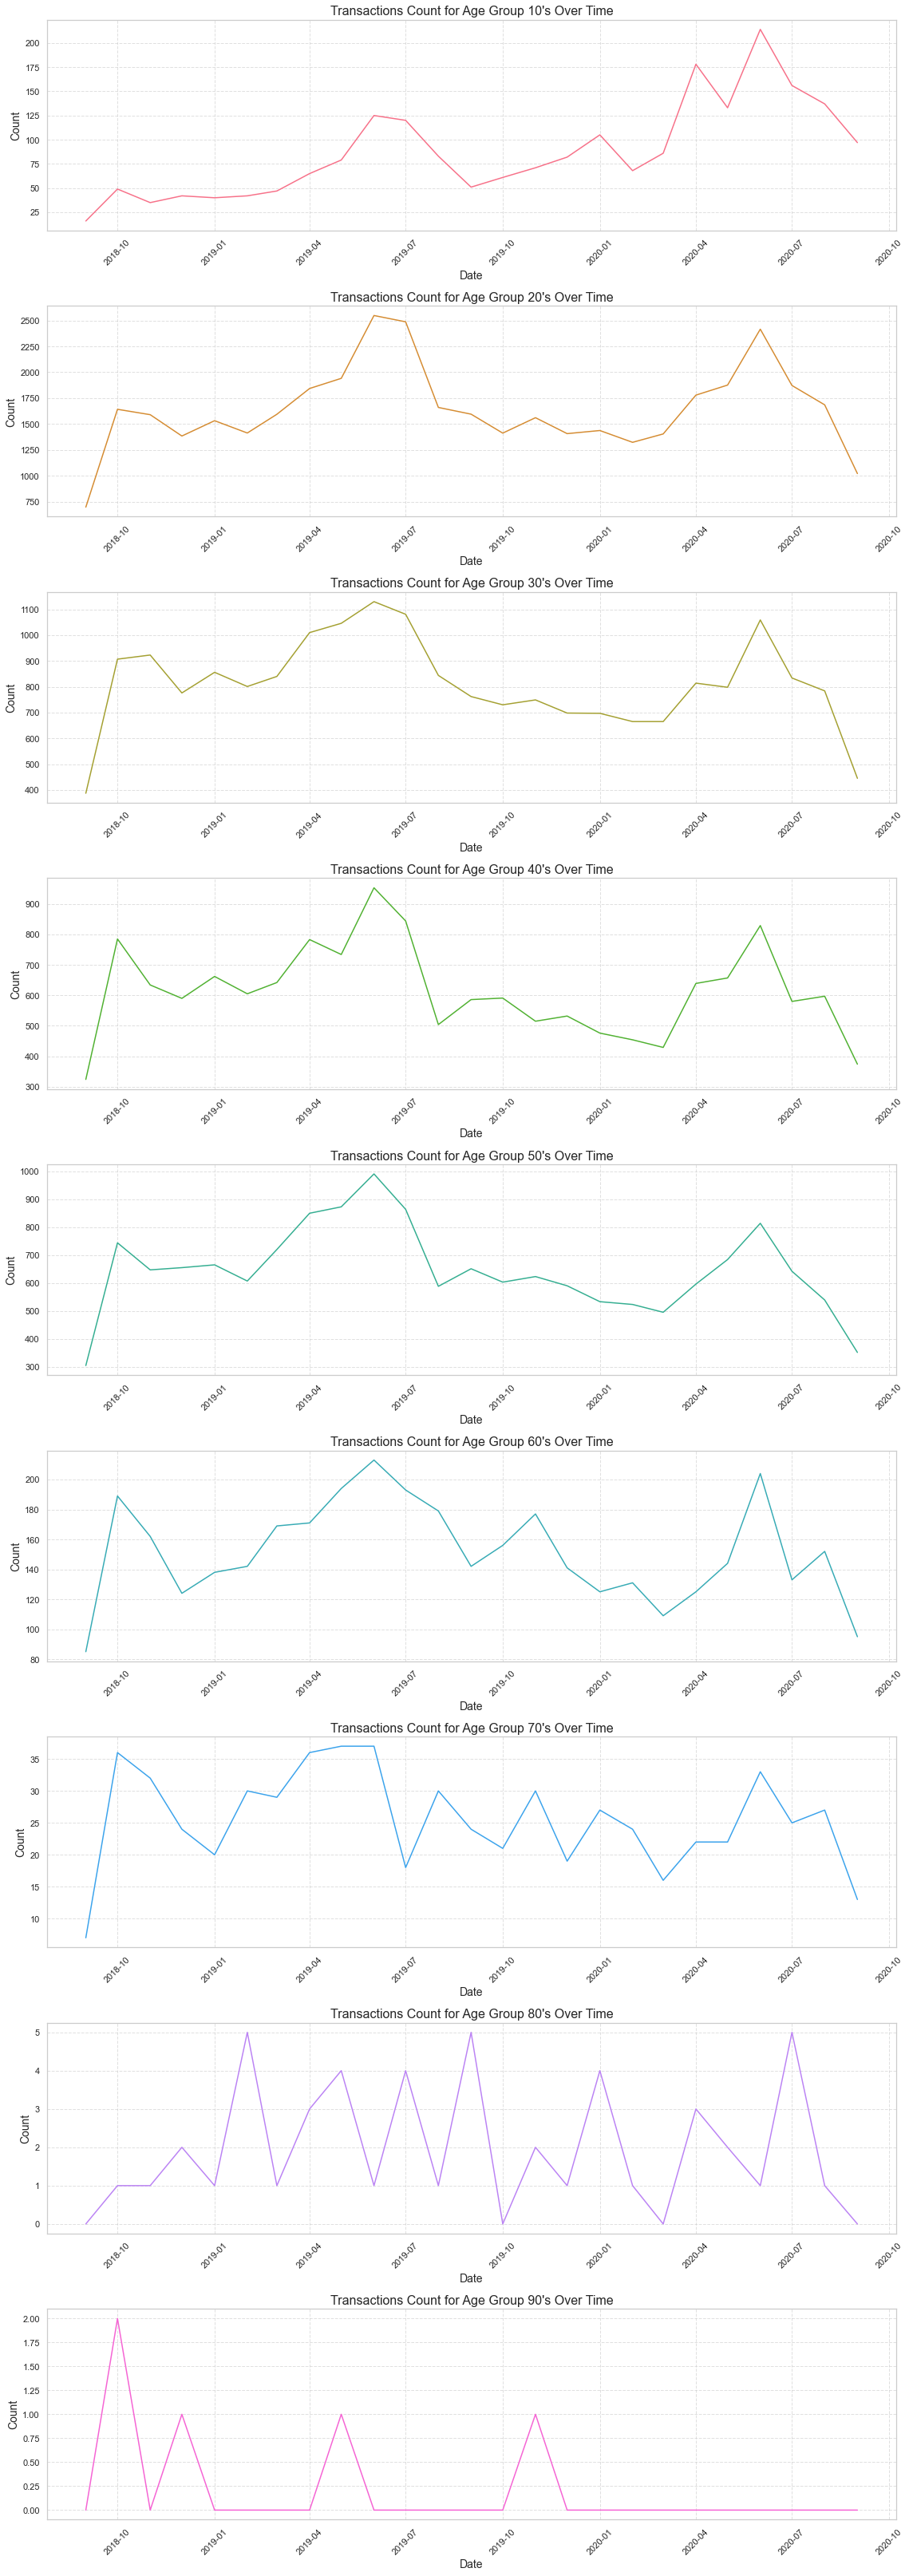

In [96]:
# Ensure 't_dat' is in datetime format
customers_for_merge['t_dat'] = pd.to_datetime(customers_for_merge['t_dat'])

# Create a year-month column
customers_for_merge['year_month'] = customers_for_merge['t_dat'].dt.to_period('M')

# Group data by 'year_month' and 'age_binned' and count occurrences
df_age_group = customers_for_merge.groupby(['year_month', 'age_binned']).size().reset_index(name='count')

# Ensure 'year_month' is in datetime format for plotting
df_age_group['year_month'] = df_age_group['year_month'].dt.to_timestamp()

# Set Seaborn style
sns.set(style="whitegrid")

# Get a list of unique age_binned categories
age_groups = df_age_group['age_binned'].unique()

# List of colors
colors = sns.color_palette('husl', len(age_groups))

# Create subplots
fig, axs = plt.subplots(len(age_groups), 1, figsize=(16, len(age_groups) * 5))

# Plot each age_binned category in each subplot
for i, (age_group, color) in enumerate(zip(age_groups, colors)):
    ax = axs[i] if len(age_groups) > 1 else axs
    sns.lineplot(data=df_age_group[df_age_group['age_binned'] == age_group],
                 x='year_month', y='count', ax=ax, color=color)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Count", fontsize=14)
    ax.set_title(f"Transactions Count for Age Group {age_group} Over Time", fontsize=16)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()